In [62]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.ticker import ScalarFormatter

In [63]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38', '#0072bc', '#F15a22', '#da6fab']
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
sns.set_style('white')

In [64]:
tissue_df = pd.read_csv('../summary_data/Figure5a.csv')
tissue_df = pd.melt(tissue_df, id_vars=['Chain type'], value_vars=['The same individuals', 'Different individuals'], 
                    var_name='sharing_type', value_name='average_shared')
tissue_df

,Chain type,sharing_type,average_shared
0,IGH,The same individuals,1.523003
1,IGK,The same individuals,13.936528
2,IGL,The same individuals,5.396147
3,IGH,Different individuals,0.100000
4,IGK,Different individuals,8.166530
5,IGL,Different individuals,2.448783


<Figure size 504x360 with 0 Axes>

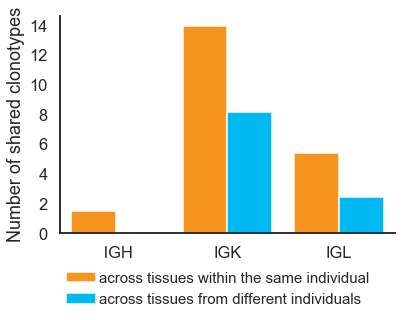

In [65]:
plt.figure(figsize=(7,5))
fig, ax = plt.subplots(nrows=1, ncols=1)

g=sns.barplot(data=tissue_df, x='Chain type', y='average_shared', hue='sharing_type', saturation=1)
g.set(xlabel='', ylabel='Number of shared clonotypes')#, yscale='log')
#plt.title("IGH")
handles, labels = g.get_legend_handles_labels()
plt.legend(handles, ['across tissues within the same individual', 'across tissues from different individuals'], 
           bbox_to_anchor=(0.47, -.4, 0, 0.), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, 
           loc='lower center', prop={'size': 15})
g=sns.despine()

ax.yaxis.set_major_formatter(ScalarFormatter())
plt.yticks(range(0,15,2))

plt.savefig('../figures/Figure5_a.png', bbox_inches='tight')
plt.savefig('../figures/Figure5_a.pdf', bbox_inches='tight')